In [1]:
import yaml
import sys
sys.path.append('../src')

from base_sindy import K_Poly_Spline, E_SINDy, BaseSINDy, GEM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/Users/terrycox/UofUCode/NumericalAnaylsisI/numerical_analysis_1/final_project/src/base_sindy.py


In [2]:
with open("../src/config.yaml", 'r') as stream:
    try:
        config=yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [3]:
config

{'mlflow': {'use_mlflow': False,
  'experiment_name': 'sindy_model',
  'run_name': 'sindy_base'},
 'data_path': '../data/massSpringData_blue_2_5.csv',
 'E_SINDy': {'n_models': 10,
  'point_ratio': 0.8,
  'optimizer': 'ridge_gem',
  'random_seed': 42},
 'SINDy': {'poly_order': 5,
  'include_t': False,
  'include_poly_predictor': False,
  'order_predict': 0,
  'thresh': 0.0001,
  'alpha': 1,
  'use_preprocessing': True,
  'k_spline': 5,
  'spline_method': 'GEM',
  'interpolated_dt': 200},
 'stls_iterates': 5,
 'percent_thresh': 0.05,
 'derivative_method': 'spline',
 'smooth_coef': 0.01,
 'derivative_smooth_coef': 0.5,
 'ridge_gm': {'tol': 1e-05, 'alpha': False},
 'ridge_jor': {'omega': 1, 'tol': 1e-05},
 'ridge_cgm': {'tol': 1e-05}}

In [4]:
if config['data_path'].endswith('massSpringData_blue_2_5.csv'):
    df = pd.read_csv(config['data_path'])[:100]
    m = df.to_numpy()
    t = m[:, 1]
    X = np.array([m[:, 3]])
elif 'tea' in config['data_path']:
    df = pd.read_csv(config['data_path'])
    df = df[df.time < 500]
    df = df[df.time > 7]
    df = df.iloc[list(range(0, len(df), 5))]
    m = df.to_numpy()
    t = m[:, 0]
    X = m[:, 1:].T
elif 'singleGreen200' in config['data_path']:
    df = pd.read_csv(config['data_path'])
    m = df.to_numpy()
    t = m[:, 0]
    X = m[:, 1:].T
else:
    
    t = np.linspace(0,12.5, 200)
    c0 = 1
    c1 = 1
    k = 0.25
    
    X = np.array([c0*np.cos(np.sqrt(k)*t)+c1*np.sin(np.sqrt(k)*t)])
    df = pd.DataFrame(np.array([t, X[0]]).T, columns=['t', 'x'])
t.shape, X.shape

((100,), (1, 100))

In [5]:
df

,#,Time (s),Position (m),Position (m).1
0,1,0.00,0.614,0.480
1,2,0.02,0.605,0.472
2,3,0.04,0.596,0.463
3,4,0.06,0.588,0.454
4,5,0.08,0.580,0.444
...,...,...,...,...
95,96,1.90,0.619,0.507
96,97,1.92,0.610,0.501
97,98,1.94,0.601,0.494
98,99,1.96,0.592,0.486


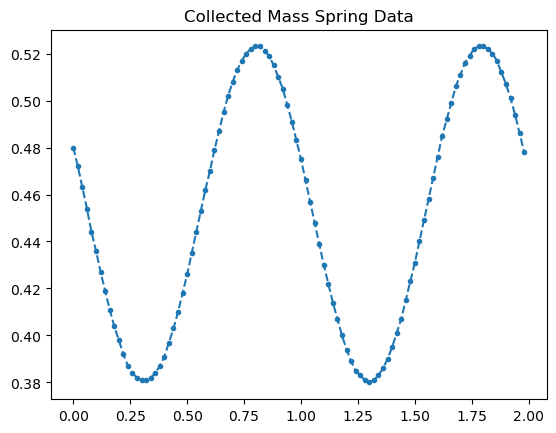

In [6]:
for x in X:
    plt.plot(t, x, '.--')
plt.title('Collected Mass Spring Data')
#plt.savefig('./images/massspring.png')
plt.show()

In [7]:
plt.plot(t, esindy.all_spline[0][0].interpolate(t, 2))
plt.show()

NameError: name 'esindy' is not defined

In [8]:
esindy = E_SINDy(config, **config['E_SINDy'], **config['mlflow'])

In [9]:
esindy.fit(t, X, **config['SINDy'], stls_iterates = config['stls_iterates'])

running iteration:  0
	 start sindy..
		 start spline...
		built A and b. SIZE: (474, 474)
		 spline done.
x_0
	 sindy end.
running iteration:  1
	 start sindy..
		 start spline...
		built A and b. SIZE: (474, 474)
		 spline done.
x_0
	 sindy end.
running iteration:  2
	 start sindy..
		 start spline...
		built A and b. SIZE: (474, 474)
		 spline done.
x_0
	 sindy end.
running iteration:  3
	 start sindy..
		 start spline...
		built A and b. SIZE: (474, 474)
		 spline done.
x_0
	 sindy end.
running iteration:  4
	 start sindy..
		 start spline...
		built A and b. SIZE: (474, 474)


/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


		 spline done.
x_0
	 sindy end.
running iteration:  5
	 start sindy..
		 start spline...
		built A and b. SIZE: (474, 474)
		 spline done.
x_0
	 sindy end.
running iteration:  6
	 start sindy..
		 start spline...
		built A and b. SIZE: (474, 474)
		 spline done.
x_0
	 sindy end.
running iteration:  7
	 start sindy..
		 start spline...
		built A and b. SIZE: (474, 474)
		 spline done.
x_0
	 sindy end.
running iteration:  8
	 start sindy..
		 start spline...
		built A and b. SIZE: (474, 474)
		 spline done.
x_0
	 sindy end.
running iteration:  9
	 start sindy..
		 start spline...
		built A and b. SIZE: (474, 474)
		 spline done.
x_0
	 sindy end.


{'x_0': {'mean': {'dx_0': 0.11309352841742445,
   'dxx_0': 0.0,
   'dxxx_0': 0.0,
   'dxxxx_0': 0.0,
   'dx_0^2': 1.5473096144741914,
   'dx_0^3': 0.3705875472563888,
   'dx_0^4': -0.2171198160834907,
   'dx_0^5': 0.11311508874708057,
   'dxx_0^2': 0.0,
   'dxx_0^3': 0.0,
   'dxx_0^4': 0.0,
   'dxx_0^5': 0.0,
   'dxxx_0^2': 0.0,
   'dxxx_0^3': 0.0,
   'dxxx_0^4': 0.0,
   'dxxx_0^5': 0.0,
   'dxxxx_0^2': 0.0,
   'dxxxx_0^3': 0.0,
   'dxxxx_0^4': 0.0,
   'dxxxx_0^5': 0.0},
  'std': {'dx_0': 0.15374389957515933,
   'dxx_0': 0.0,
   'dxxx_0': 0.0,
   'dxxxx_0': 0.0,
   'dx_0^2': 0.5623102174841446,
   'dx_0^3': 0.5078039286738805,
   'dx_0^4': 0.3696988584275728,
   'dx_0^5': 0.2390590671636822,
   'dxx_0^2': 0.0,
   'dxx_0^3': 0.0,
   'dxx_0^4': 0.0,
   'dxx_0^5': 0.0,
   'dxxx_0^2': 0.0,
   'dxxx_0^3': 0.0,
   'dxxx_0^4': 0.0,
   'dxxx_0^5': 0.0,
   'dxxxx_0^2': 0.0,
   'dxxxx_0^3': 0.0,
   'dxxxx_0^4': 0.0,
   'dxxxx_0^5': 0.0},
  'df':        dx_0  dxx_0  dxxx_0  dxxxx_0    dx_0^2    d

In [10]:
a = np.array(list(esindy.coefs['x_0']['mean'].values()))
np.abs(a)/np.sum(np.abs(a))

array([0.04789611, 0.        , 0.        , 0.        , 0.65529936,
       0.15694712, 0.09195217, 0.04790524, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

,dx_0,dxx_0,dxxx_0,dxxxx_0,dx_0^2,dx_0^3,dx_0^4,dx_0^5,dxx_0^2,dxx_0^3,dxx_0^4,dxx_0^5,dxxx_0^2,dxxx_0^3,dxxx_0^4,dxxx_0^5,dxxxx_0^2,dxxxx_0^3,dxxxx_0^4,dxxxx_0^5
0,-0.014915,0,0,0,0.004309,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0
1,0.243529,0,0,0,1.595835,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0
2,0.000000,0,0,0,1.693071,0.508650,0.000000,0.529923,0,0,0,0,0,0,0,0,0,0,0,0
3,0.000000,0,0,0,1.845422,1.099005,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0
4,0.000000,0,0,0,1.657621,0.000000,-0.946930,0.000000,0,0,0,0,0,0,0,0,0,0,0,0
5,0.000000,0,0,0,1.730698,0.934365,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0
6,0.271307,0,0,0,1.801583,0.000000,-0.778586,0.000000,0,0,0,0,0,0,0,0,0,0,0,0
7,0.380355,0,0,0,1.392491,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0
8,0.250658,0,0,0,1.906603,0.000000,-0.445682,0.601228,0,0,0,0,0,0,0,0,0,0,0,0
9,0.000000,0,0,0,1.845463,1.163856,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0


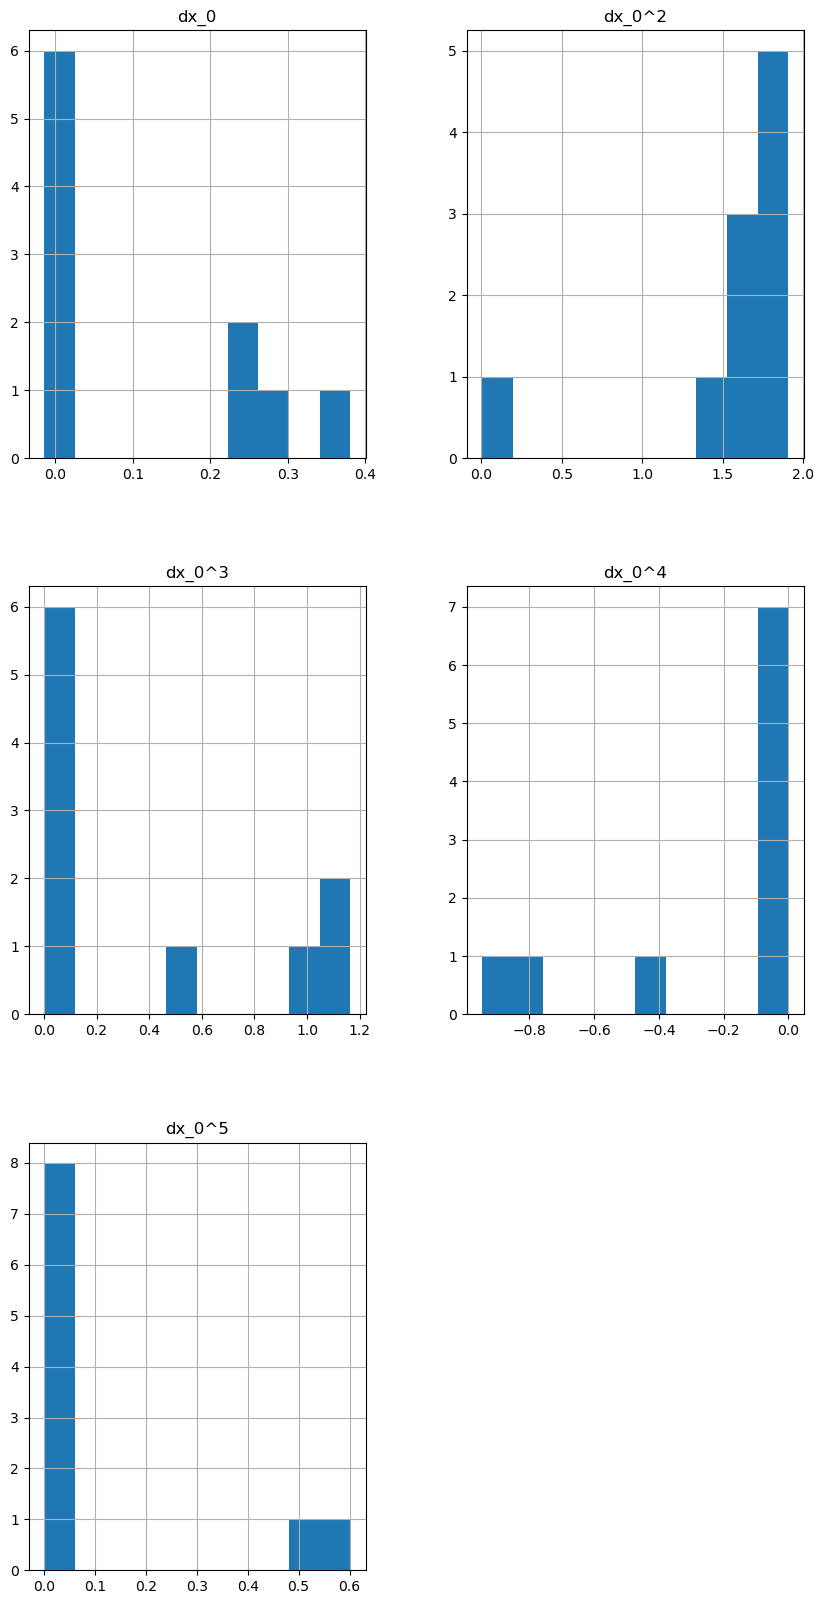

In [11]:
df_coefs = esindy.coefs['x_0']['df']
df_coefs[[a for a in df_coefs.columns if np.sum(np.abs(df_coefs[a])) > 0.0001]].hist(figsize=(10,20))
df_coefs

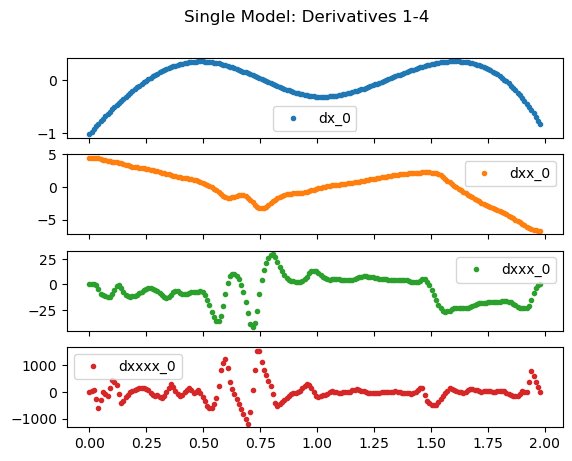

In [12]:
esindy.all_dfs[6][[k for k, v in esindy.coefs['x_0']['mean'].items() if '^' not in k]].plot(subplots=True, style='.')
plt.suptitle('Single Model: Derivatives 1-4')
plt.savefig('./images/single_model.png')
plt.show()

In [61]:
esindy.all_dfs[1]

,dx_0,dxx_0,dxxx_0,dx_0^2,dx_0^3,dx_0^4,dx_0^5,dxx_0^2,dxx_0^3,dxx_0^4,dxx_0^5,dxxx_0^2,dxxx_0^3,dxxx_0^4,dxxx_0^5
0.00,0.222482,-0.545710,0.611168,4.949814e-02,1.101244e-02,2.450066e-03,5.450951e-04,0.297800,-1.625122e-01,8.868458e-02,-4.839608e-02,0.373526,0.228287,0.139521,0.085271
0.06,0.190043,-0.509040,0.611336,3.611627e-02,6.863637e-03,1.304385e-03,2.478890e-04,0.259122,-1.319036e-01,6.714429e-02,-3.417916e-02,0.373732,0.228476,0.139675,0.085389
0.08,0.179726,-0.496815,0.611396,3.230145e-02,5.805412e-03,1.043384e-03,1.875232e-04,0.246825,-1.226262e-01,6.092252e-02,-3.026720e-02,0.373805,0.228543,0.139730,0.085431
0.10,0.169657,-0.484588,0.611458,2.878358e-02,4.883344e-03,8.284947e-04,1.405601e-04,0.234825,-1.137935e-01,5.514291e-02,-2.672158e-02,0.373881,0.228612,0.139787,0.085474
0.12,0.159836,-0.472359,0.611522,2.554766e-02,4.083446e-03,6.526831e-04,1.043225e-04,0.223123,-1.053945e-01,4.978408e-02,-2.351598e-02,0.373959,0.228684,0.139845,0.085518
0.14,0.150263,-0.460130,0.611587,2.257906e-02,3.392804e-03,5.098140e-04,7.660634e-05,0.211719,-9.741843e-02,4.482513e-02,-2.062538e-02,0.374039,0.228757,0.139905,0.085564
0.26,0.098025,-0.386722,0.612020,9.608866e-03,9.419074e-04,9.233031e-05,9.050662e-06,0.149554,-5.783578e-02,2.236637e-02,-8.649567e-03,0.374568,0.229243,0.140301,0.085867
0.28,0.090184,-0.374482,0.612098,8.133212e-03,7.334882e-04,6.614914e-05,5.965616e-06,0.140237,-5.251617e-02,1.966636e-02,-7.364700e-03,0.374665,0.229332,0.140374,0.085922
0.34,0.068146,-0.337753,0.612345,4.643833e-03,3.164571e-04,2.156518e-05,1.469574e-06,0.114077,-3.852971e-02,1.301351e-02,-4.395344e-03,0.374967,0.229609,0.140600,0.086096
0.36,0.061293,-0.325506,0.612431,3.756890e-03,2.302729e-04,1.411422e-05,8.651099e-07,0.105954,-3.448870e-02,1.122628e-02,-3.654221e-03,0.375072,0.229705,0.140679,0.086156


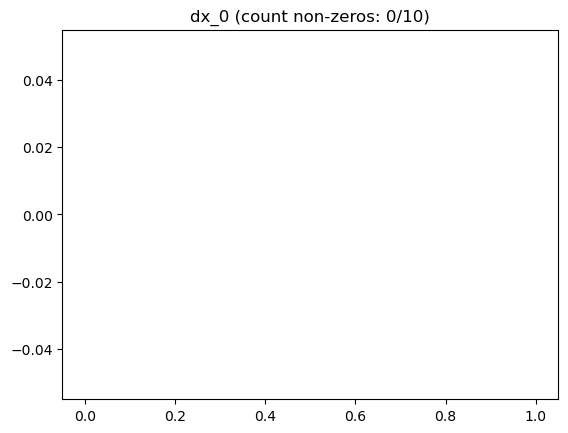

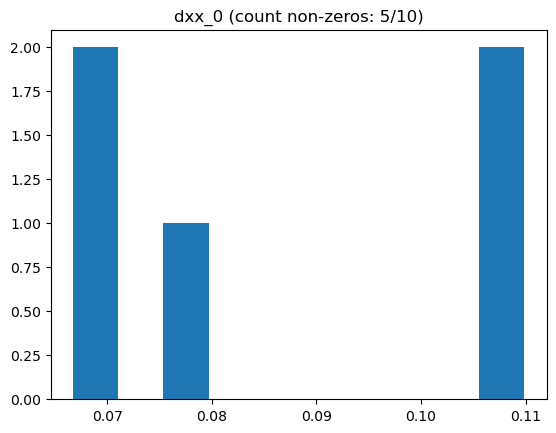

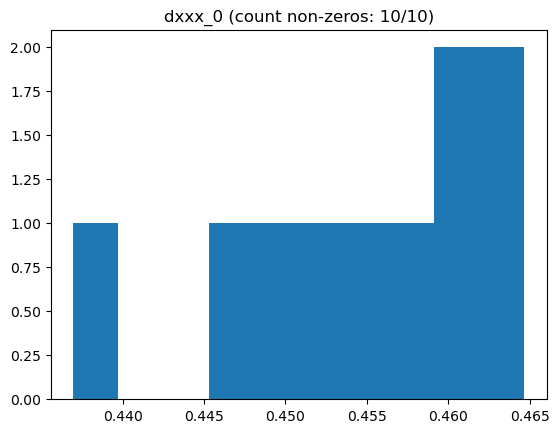

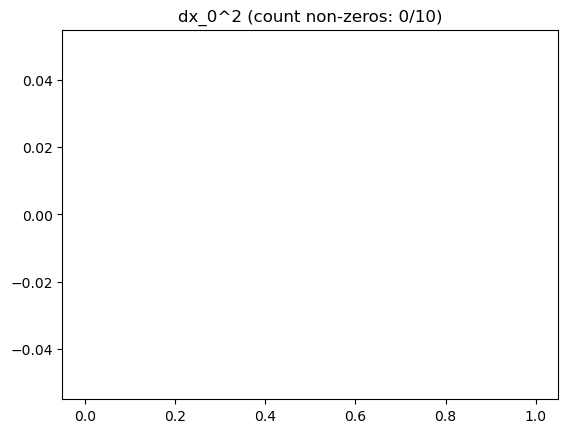

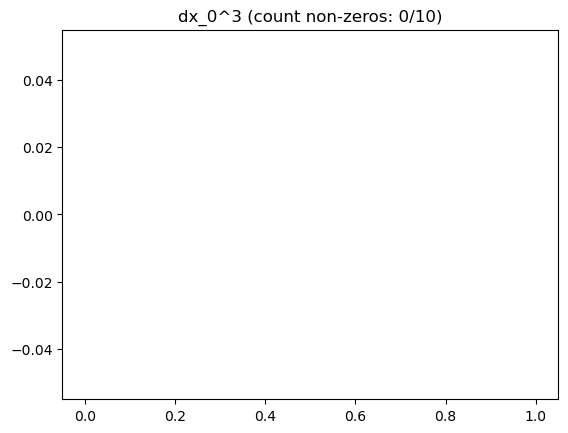

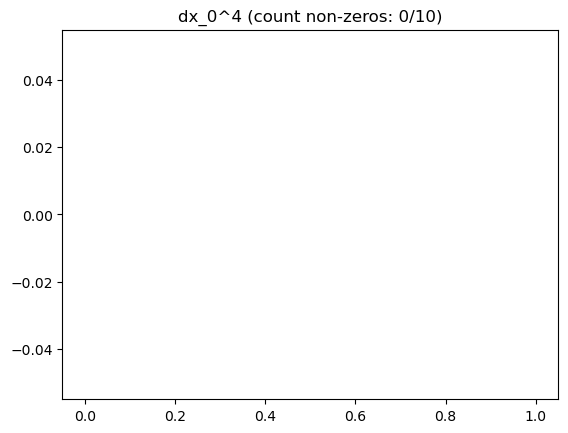

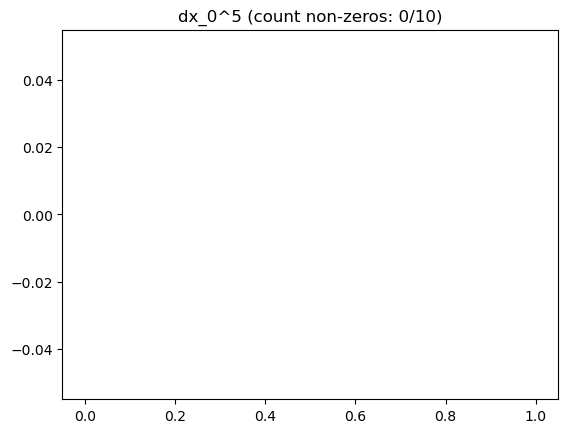

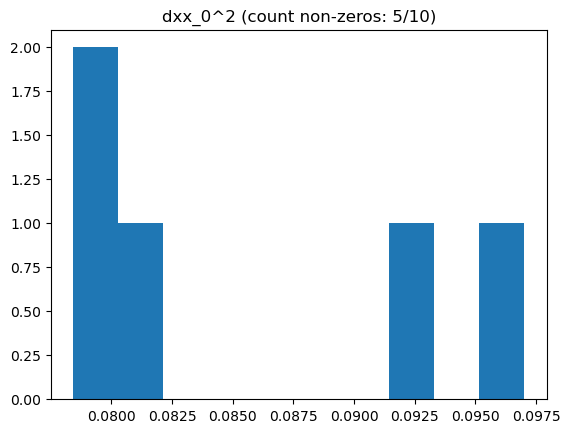

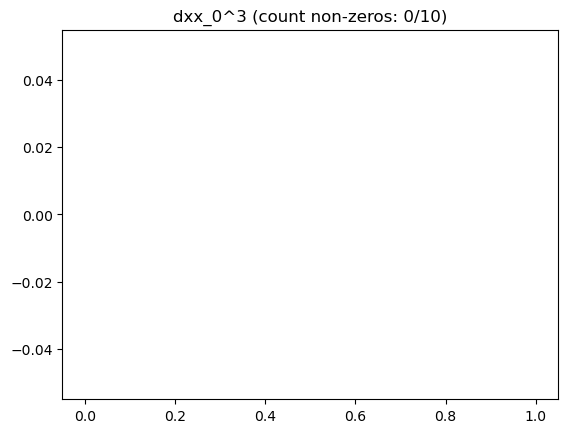

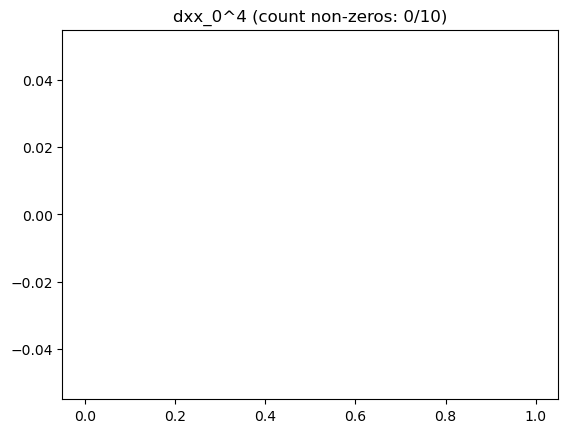

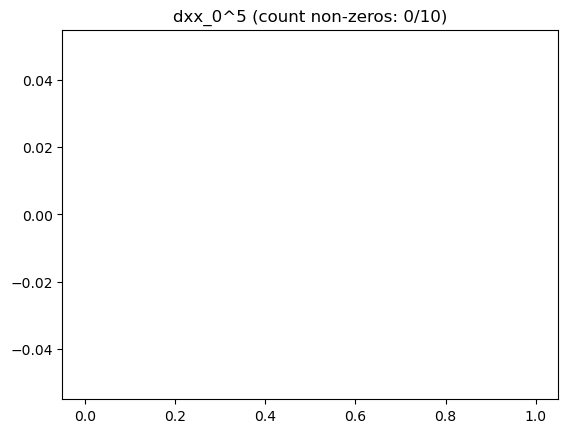

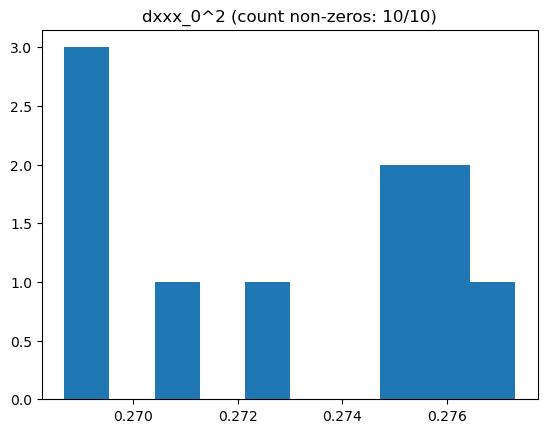

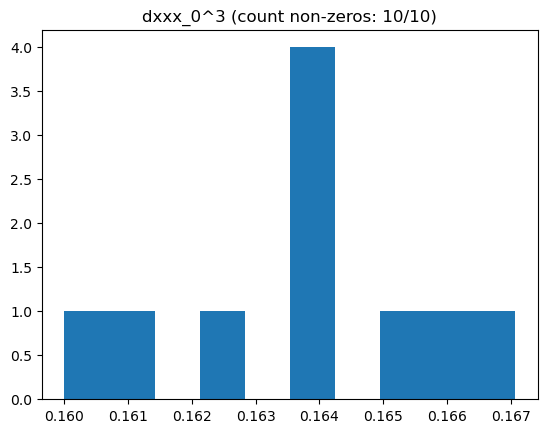

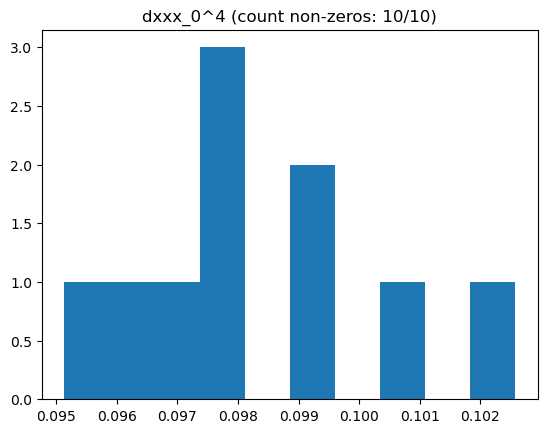

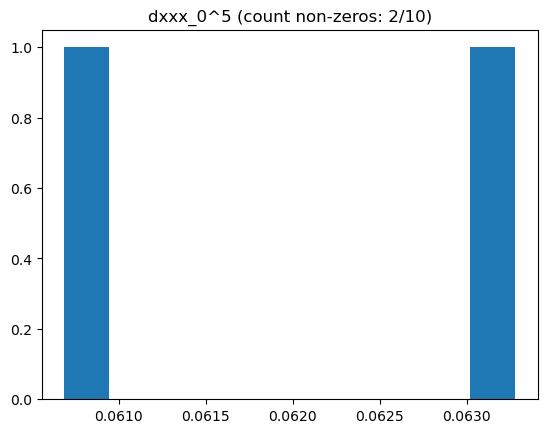

In [62]:
n_models = config['E_SINDy']['n_models']
for col in esindy.coefs['x_0']['df'].columns:
    non_zero = [v for v in esindy.coefs['x_0']['df'][col] if np.abs(v) > esindy.thresh]
    plt.hist(non_zero)
    plt.title(f'{col} (count non-zeros: {len(non_zero)}/{n_models})')
    plt.show()

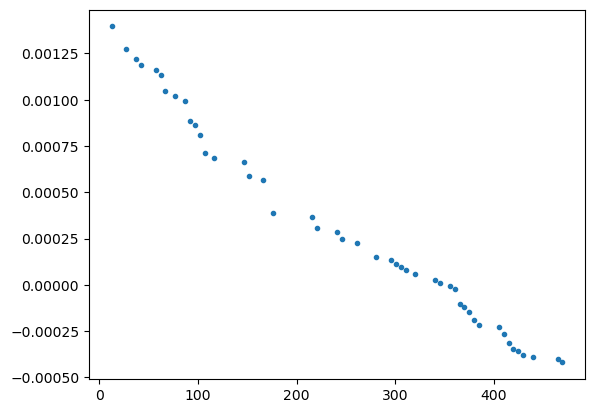

In [40]:
plt.plot(esindy.all_dfs[3].index, esindy.all_dfs[0].dxx_0, '.')
plt.show()

TypeError: 'NoneType' object is not subscriptable

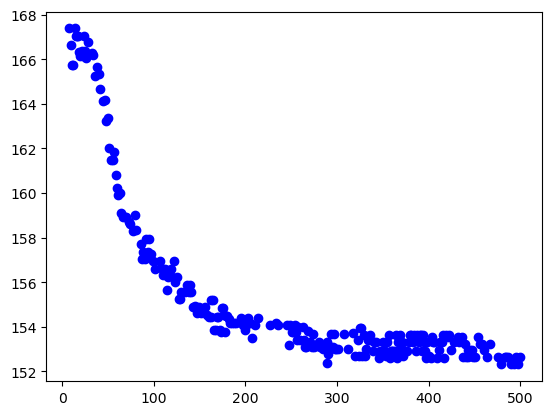

In [41]:
plt.plot(t, X[0], 'bo')
t_s = np.linspace(t[0], t[-1], 500)
x_s = esindy.all_spline[0][0].interpolate(t_s, 0)
plt.plot(t_s[0:], x_s[0:], 'r')
plt.show()

In [24]:
def least_squares_gem(df_X, b):
    X = np.asmatrix(df_X.to_numpy())
    b = np.array(b)
    print(b.shape, X.shape)
    A = np.matmul(X.T,X)
    print(A.shape, np.matmul(X.T,b.T).T.shape)
    I = np.identity(A.shape[0])
    x = GEM((A), np.matmul(X.T,b.T))
    #x = np.linalg.solve(A, np.matmul(X.T,b.T))
    return x

In [ ]:
config['SINDy']['spline_method'] = 'GEM'
sindy = BaseSINDy(config, **config['SINDy'], **config['mlflow'])
X_vars, b_vars = sindy.build_ThetaX(t, X)
keepers = ['dxx_0']
df_X = pd.DataFrame(X_vars[0].T, columns=X_vars[1])[keepers]
df_X.index = sindy.t
x_pred = least_squares_gem(df_X, b_vars[0])
list(zip(keepers, x_pred))

		 start spline...
		built A and b. SIZE: (1194, 1194)


<AxesSubplot:>

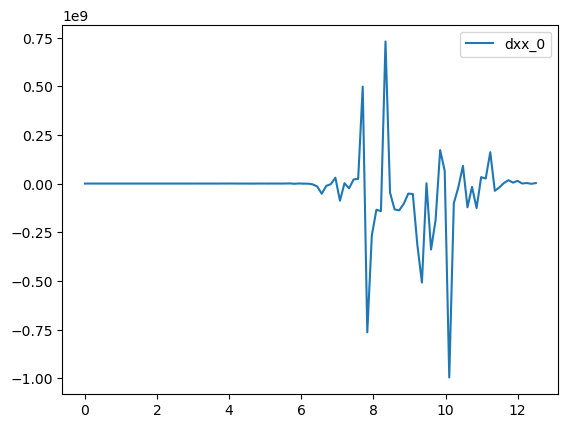

In [26]:
df_X.plot()

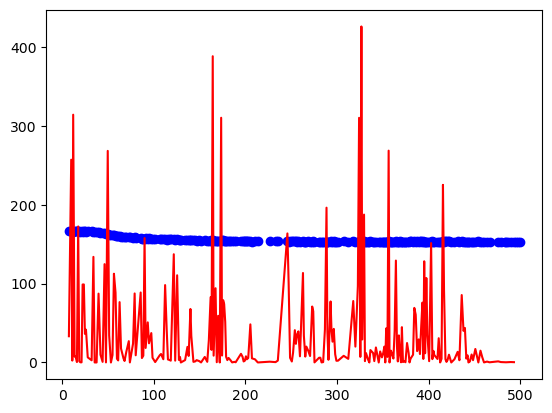

In [48]:
plt.plot(t, X[0], 'bo')
t_s = np.linspace(t[0], t[-1], 100)
x_s = np.zeros(len(df_X))
for l, c in list(zip(keepers, x_pred)):
    x_s += c*np.array(df_X[l])
plt.plot(df_X.index, x_s[0:], 'r')
plt.show()

In [72]:
np.asmatrix(df_X.to_numpy()).shape, np.array(b_vars[0]).shape

((197, 5), (1, 197))

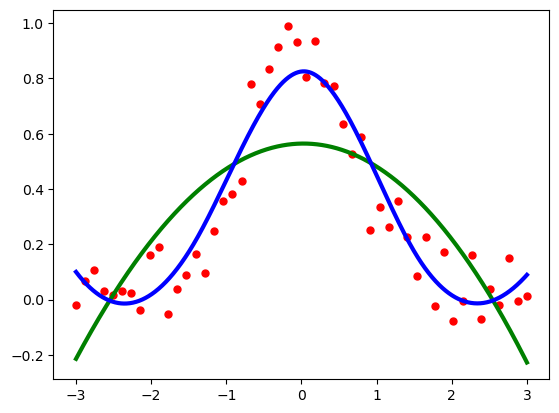

In [72]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
rng = np.random.default_rng()
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * rng.standard_normal(50)
plt.plot(x, y, 'ro', ms=5)

spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, spl(xs), 'g', lw=3)

spl.set_smoothing_factor(0.5)
plt.plot(xs, spl(xs), 'b', lw=3)
plt.show()

In [73]:
from sklearn.linear_model import Ridge, Lasso

In [74]:
esindy.all_dfs[0]

,dx_0,dxx_0,dxxx_0,dx_0^2,dx_0^3,dx_0^4,dx_0^5,dxx_0^2,dxx_0^3,dxx_0^4,dxx_0^5,dxxx_0^2,dxxx_0^3,dxxx_0^4,dxxx_0^5
0,0.708373,-0.428789,-0.668010,0.501792,0.355456,0.251795,0.178365,0.183860,-0.078837,0.033804,-0.014495,0.446237,-0.298091,0.199128,-0.133019
1,0.682204,-0.464554,-0.623840,0.465403,0.317500,0.216600,0.147765,0.215811,-0.100256,0.046574,-0.021636,0.389176,-0.242784,0.151458,-0.094486
2,0.655137,-0.498195,-0.580731,0.429204,0.281187,0.184216,0.120687,0.248198,-0.123651,0.061602,-0.030690,0.337248,-0.195850,0.113736,-0.066050
3,0.627211,-0.529745,-0.538671,0.393394,0.246741,0.154759,0.097066,0.280630,-0.148662,0.078753,-0.041719,0.290167,-0.156305,0.084197,-0.045354
4,0.598470,-0.559239,-0.497653,0.358166,0.214351,0.128283,0.076773,0.312748,-0.174901,0.097811,-0.054700,0.247658,-0.123248,0.061335,-0.030523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,-1.004344,0.223629,1.194417,1.008706,-1.013087,1.017488,-1.021907,0.050010,0.011184,0.002501,0.000559,1.426633,1.703995,2.035282,2.430976
244,-0.993679,0.278814,1.240801,0.987399,-0.981158,0.974956,-0.968794,0.077737,0.021674,0.006043,0.001685,1.539587,1.910321,2.370328,2.941105
245,-0.980553,0.335821,1.287974,0.961485,-0.942787,0.924452,-0.906475,0.112775,0.037872,0.012718,0.004271,1.658877,2.136590,2.751873,3.544341
246,-0.964904,0.394671,1.335942,0.931040,-0.898365,0.866836,-0.836414,0.155765,0.061476,0.024263,0.009576,1.784740,2.384309,3.185298,4.255372


In [45]:
dx = np.diff(x_s)/np.diff(t_s)
dxx = np.diff(dx)/np.diff(t_s[:-1])
plt.plot(t, X[0], '.')
plt.plot(t_s, x_s, 'r')
plt.plot(t_s[0:-1], dx)
plt.plot(t_s[:-2], dxx)
plt.plot(t_s, esindy.all_spline[0].interpolate(t_s, 1))
plt.show()

NameError: name 'x_s' is not defined

In [40]:
esindy.all_spline

In [41]:
r = Ridge(1).fit(np.array([dx[:-1], dxx]).T, x_s[:-2])
r.coef_

array([-0.06117192, -0.10111825])

In [13]:
np.sum(np.abs(esindy.all_dfs[0].dxx_0/10-X[0][:-4]))

ValueError: operands could not be broadcast together with shapes (58,) (96,) 

In [16]:
r = Ridge(0.2).fit(esindy.all_dfs[0].to_numpy(), X[0][1:-4])

ValueError: Found input variables with inconsistent numbers of samples: [121, 95]

In [ ]:
list(zip(esindy.all_dfs[0].columns, r.coef_))

In [20]:
def take_first_derivative(t, x):
        return (-1*x[4:]+8*x[3:-1]-8*x[1:-3]+x[:-4])/(12*np.diff(t)[1:-2])

def take_second_derivative(t, x):
    return (-1*x[4:]+16*x[3:-1]-30*x[2:-2]+16*x[1:-3]+x[:-4])/(12*np.diff(t)[1:-2]**2)

def take_third_derivative(t, x):
    return (x[4:] - 2*x[3:-1] + 2*x[1:-3] - x[:-4])/(2*np.diff(t)[1:-2]**3)

def take_forth_derivative(t, x):
    return (x[4:] - 4*x[3:-1] + 6*x[2:-2] - 4*x[1:-3] + x[:-4])/(np.diff(t)[1:-2]**4)

In [21]:
take_second_derivative(t, X[0]).shape

(96,)